In [ ]:
# !unzip -uq "/content/drive/MyDrive/colab/hoc lai/Multilabel/data.zip" -d "/content/drive/MyDrive/colab/hoc lai/Multilabel"

In [1]:
import pandas as pd

In [5]:
image_path = '/content/drive/MyDrive/colab/hoc lai/Multilabel/data/'

df = pd.read_csv('/content/drive/MyDrive/colab/hoc lai/Multilabel/New_update.csv')
df_test = df.iloc[5000:5010]
df = df.iloc[:2500]


In [ ]:
print(df)

In [ ]:
print(df.shape[0])

4000


In [6]:
from keras.preprocessing import image
import os
import numpy as np
SIZE = 200
X_dataset = []
for i in range(df.shape[0]):
  img = image.load_img(image_path + df['Id'][i] + '.jpg')
  img = image.img_to_array(img)
  img = img/255.0
  X_dataset.append(img)


In [7]:
print(len(X_dataset))
print(df['Id'][100])
print(df['Genre'][100])

2500
tt0085551
['Comedy', 'Music']


In [8]:
x = np.array(X_dataset)
y = np.array(df.drop(['Id','Genre','Unnamed: 0', 'Unnamed: 0.1'], axis=1))
print(len(x))
print(len(y))

2500
2500


In [ ]:
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from keras.models import Input, Sequential, Model
from keras.layers import Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten

from keras.applications.vgg16 import VGG16

In [19]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE,3))
for layer in VGG_model.layers:
  layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [24]:
output_vgg = Model(inputs=VGG_model.input, outputs=VGG_model.get_layer('block5_pool').output)
output_vgg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [25]:
features = output_vgg.output
x = Flatten()(features)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
final_output = Dense(25, activation='sigmoid')(x)

my_model = Model(inputs=output_vgg.input, outputs=final_output)
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
my_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [27]:
H = my_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)

Epoch 1/20
32/32 [==============================] - 34s 838ms/step - loss: 0.4170 - accuracy: 0.1195 - val_loss: 0.2493 - val_accuracy: 0.2600
Epoch 2/20
32/32 [==============================] - 20s 616ms/step - loss: 0.2916 - accuracy: 0.2480 - val_loss: 0.2404 - val_accuracy: 0.3280
Epoch 3/20
32/32 [==============================] - 20s 616ms/step - loss: 0.2669 - accuracy: 0.2855 - val_loss: 0.2306 - val_accuracy: 0.3160
Epoch 4/20
32/32 [==============================] - 19s 613ms/step - loss: 0.2533 - accuracy: 0.3230 - val_loss: 0.2297 - val_accuracy: 0.4340
Epoch 5/20
32/32 [==============================] - 20s 615ms/step - loss: 0.2394 - accuracy: 0.3480 - val_loss: 0.2274 - val_accuracy: 0.3620
Epoch 6/20
32/32 [==============================] - 19s 613ms/step - loss: 0.2313 - accuracy: 0.3620 - val_loss: 0.2271 - val_accuracy: 0.3440
Epoch 7/20
32/32 [==============================] - 20s 614ms/step - loss: 0.2217 - accuracy: 0.3730 - val_loss: 0.2284 - val_accuracy: 0.3260

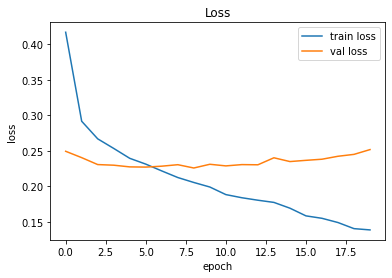

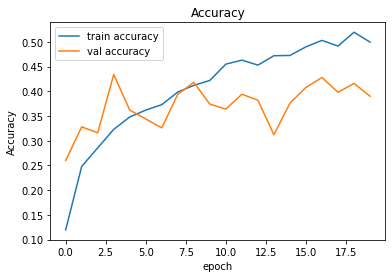

In [28]:
import matplotlib.pyplot as plt

plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(H.history['accuracy'], label='train accuracy')
plt.plot(H.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

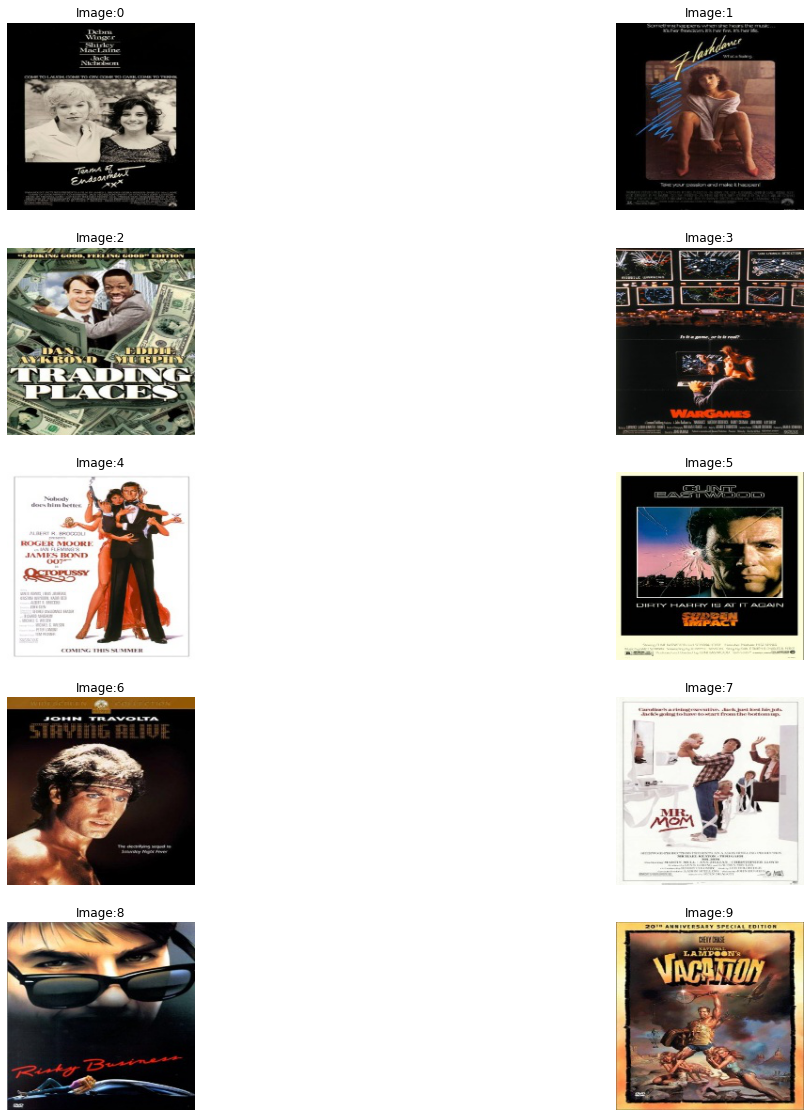

In [37]:
x_test = []

fig = plt.figure(figsize=(20, 20))
for i in range(df_test.shape[0]):
  img = image.load_img(image_path + df['Id'][i] + '.jpg')
  fig.add_subplot(5, 2, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title('Image:{}'.format(i))
  img = image.img_to_array(img)
  img = img/255.0
  
  x_test.append(img)

x_test = np.array(x_test)
y_true = df_test.drop(['Id','Genre','Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [65]:
y_pred = my_model.predict(x_test)

In [66]:
classes = np.array(df_test.columns[4:])
print(classes)

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'History' 'Horror' 'Music'
 'Musical' 'Mystery' 'N/A' 'News' 'Reality-TV' 'Romance' 'Sci-Fi' 'Short'
 'Sport' 'Thriller' 'War' 'Western']


In [67]:
y_true = np.array(df_test['Genre'])
print(y_true)

["['Drama', 'Thriller', 'War']" "['Crime', 'Drama', 'Thriller']"
 "['Comedy', 'Romance']" "['Action', 'Adventure', 'Sci-Fi']"
 "['Action', 'Adventure', 'Horror']" "['Comedy', 'Romance']"
 "['Action', 'Adventure', 'Fantasy']" "['Action', 'Crime', 'Drama']"
 "['Adventure', 'Family', 'Fantasy']" "['Action', 'Adventure', 'Comedy']"]


In [70]:
sorted_categories = []
for i in range(y_pred.shape[0]):
  sorted_categories.append(np.argsort(y_pred[i])[-5:])
print(sorted_categories)

[array([21,  9, 18,  4,  7]), array([ 3,  4, 12, 18,  7]), array([9, 1, 7, 8, 4]), array([ 7,  0, 19, 11, 22]), array([19,  7, 22,  1,  0]), array([ 1,  5,  7,  0, 22]), array([ 1,  4, 12, 18,  7]), array([ 5, 12, 18,  7,  4]), array([ 0, 18,  4,  5,  7]), array([9, 8, 0, 4, 1])]


In [49]:
print(y_pred[0])

[4.1610403e-03 3.4277563e-03 6.7324123e-05 1.4191565e-02 6.2864584e-01
 7.7261636e-03 4.6181502e-03 8.3683074e-01 2.6928729e-03 1.7444806e-02
 9.4126025e-03 2.7636660e-03 9.8113501e-03 5.4922100e-04 5.0531966e-03
 3.1504016e-05 2.5868172e-05 1.2809498e-06 8.8291168e-02 4.3256817e-04
 4.2816624e-05 1.6811527e-02 1.3525390e-02 2.1924272e-03 3.1254609e-04]


In [71]:
for i in range(len(sorted_categories)):
  for j in range(len(sorted_categories[0])):
    print("{}".format(classes[sorted_categories[i][j]])+" ({:.3})".format(y_pred[i][sorted_categories[i][j]]))
  print('----------')

Sport (0.0168)
Fantasy (0.0174)
Romance (0.0883)
Comedy (0.629)
Drama (0.837)
----------
Biography (0.137)
Comedy (0.156)
Music (0.16)
Romance (0.46)
Drama (0.916)
----------
Fantasy (0.0297)
Adventure (0.0308)
Drama (0.0378)
Family (0.0726)
Comedy (0.995)
----------
Drama (0.215)
Action (0.292)
Sci-Fi (0.386)
Horror (0.503)
Thriller (0.536)
----------
Sci-Fi (0.0741)
Drama (0.185)
Thriller (0.256)
Adventure (0.711)
Action (0.822)
----------
Adventure (0.0992)
Crime (0.127)
Drama (0.391)
Action (0.605)
Thriller (0.621)
----------
Adventure (0.0917)
Comedy (0.254)
Music (0.326)
Romance (0.46)
Drama (0.772)
----------
Crime (0.01)
Music (0.0128)
Romance (0.641)
Drama (0.923)
Comedy (0.952)
----------
Action (0.085)
Romance (0.163)
Comedy (0.328)
Crime (0.654)
Drama (0.945)
----------
Fantasy (0.123)
Family (0.129)
Action (0.225)
Comedy (0.754)
Adventure (0.815)
----------


In [72]:
my_model.save('/content/drive/MyDrive/colab/hoc lai/Multilabel/my_model1.h5')

In [73]:
H = my_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)

Epoch 1/20
32/32 [==============================] - 20s 623ms/step - loss: 0.1337 - accuracy: 0.5200 - val_loss: 0.2582 - val_accuracy: 0.4200
Epoch 2/20
32/32 [==============================] - 20s 616ms/step - loss: 0.1350 - accuracy: 0.5100 - val_loss: 0.2574 - val_accuracy: 0.3460
Epoch 3/20
32/32 [==============================] - 20s 618ms/step - loss: 0.1315 - accuracy: 0.5115 - val_loss: 0.2535 - val_accuracy: 0.4100
Epoch 4/20
32/32 [==============================] - 20s 615ms/step - loss: 0.1256 - accuracy: 0.5455 - val_loss: 0.2732 - val_accuracy: 0.3620
Epoch 5/20
32/32 [==============================] - 20s 617ms/step - loss: 0.1257 - accuracy: 0.5125 - val_loss: 0.2611 - val_accuracy: 0.3860
Epoch 6/20
32/32 [==============================] - 20s 615ms/step - loss: 0.1230 - accuracy: 0.5245 - val_loss: 0.2720 - val_accuracy: 0.3760
Epoch 7/20
32/32 [==============================] - 20s 614ms/step - loss: 0.1182 - accuracy: 0.5150 - val_loss: 0.2739 - val_accuracy: 0.4020